In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load the dataset
data= pd.read_csv('/content/drive/My Drive/UCI_Credit_Card.csv')
data.head()# show the head of dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [144]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* There are 30,000 distinct credit card clients.

* The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

* Education level is mostly graduate school and university.

* Most of the clients are either marrined or single (less frequent the other status).

* Average age is 35.5 years, with a standard deviation of 9.2.

* As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).


In [145]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

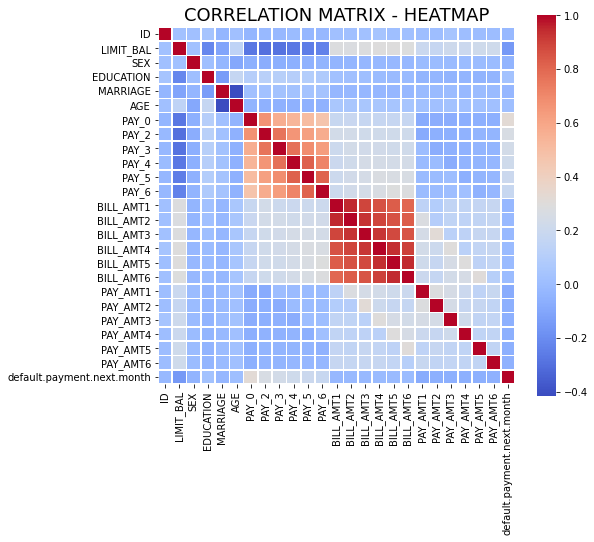

In [146]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

# Hypothesis testing

In [147]:
#Segregating the numeric and categorical variable names

numeric=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print('numerical = ' ,numeric)
print('categorical = ' ,catgorical)

numerical =  ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
categorical =  []


In [148]:
default_yes = data.loc[data["default.payment.next.month"] == 1]
default_no =  data.loc[data["default.payment.next.month"] == 0]    

## two Sample t-test

In [149]:
## performing the independent t test on numerical variables
import scipy.stats as stats
#make a dataframe
tstats_df = pd.DataFrame()
# run a loop for all numerical variable
for eachvariable in numeric:
    
    tstats = stats.ttest_ind(data.loc[data["default.payment.next.month"] == 1,eachvariable],data.loc[data["default.payment.next.month"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)
tstats_df

,Variable Name,T-Statistic,P-Value
0,default.payment.next.month,inf,0
1,PAY_0,48.6186,0
2,PAY_2,38.6949,7.5025e-302
3,PAY_3,34.5357,8.3931e-245
4,PAY_4,31.0213,3.88736e-200
5,LIMIT_BAL,-28.9516,3.3641e-178
6,PAY_5,28.8882,5.64313e-175
7,PAY_6,26.7018,7.35558e-151
8,PAY_AMT1,-17.5125,3.54587e-68
9,PAY_AMT2,-14.8172,1.88197e-49


In [150]:
data1 = data.copy()

In [151]:
# data1.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

# Data Visualazition

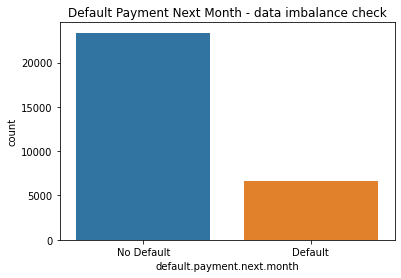

In [152]:
data['default.payment.next.month'].value_counts()
plt.title('Default Payment Next Month - data imbalance check')
ax1 = sns.countplot(x= 'default.payment.next.month', data = data)
ax1.set_xticklabels(['No Default','Default'])
plt.show()

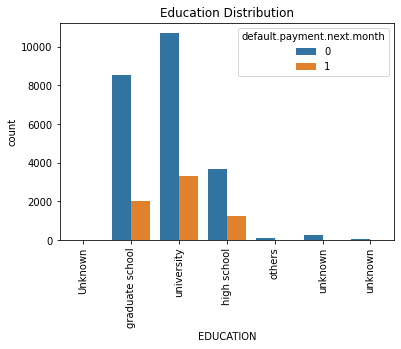

In [153]:
# Education Distribution
plt.title('Education Distribution')
ax2 = sns.countplot(x= 'EDUCATION', hue = 'default.payment.next.month', data = data)
ax2.set_xticklabels(['Unknown','graduate school','university','high school','others','unknown','unknown'],rotation = 90)
plt.show()

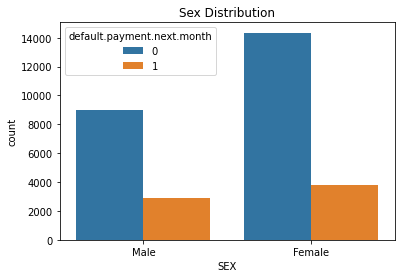

In [154]:
# SEX distribution
plt.title('Sex Distribution')
ax3 = sns.countplot(x= 'SEX', hue = 'default.payment.next.month', data = data)
ax3.set_xticklabels(['Male','Female'])
plt.show()

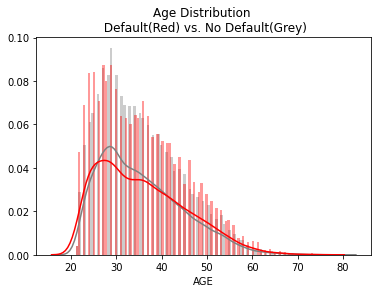

In [155]:
# Age Distribution
plt.title('Age Distribution \n Default(Red) vs. No Default(Grey)')
agedist0 = data[data['default.payment.next.month']==0]['AGE']
agedist1 = data[data['default.payment.next.month']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'grey')
sns.distplot(agedist1, bins = 100, color = 'red')
plt.show()

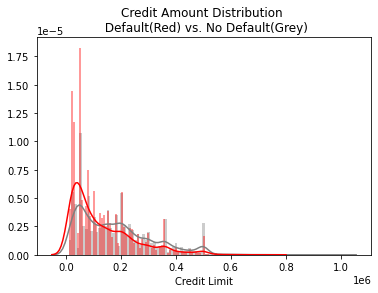

In [156]:
# Credit Amount Distribution
plt.title('Credit Amount Distribution \n Default(Red) vs. No Default(Grey)')
cadist0 = data[data['default.payment.next.month']==0]['LIMIT_BAL']
cadist1 = data[data['default.payment.next.month']==1]['LIMIT_BAL']
sns.distplot(cadist0, bins = 100, color = 'grey')
sns.distplot(cadist1, bins = 100, color = 'red')
plt.xlabel('Credit Limit')
plt.show()

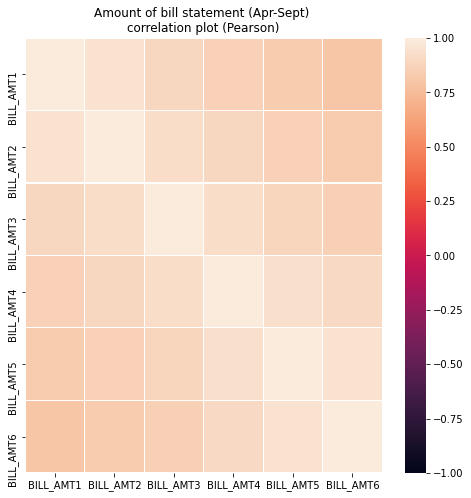

In [157]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

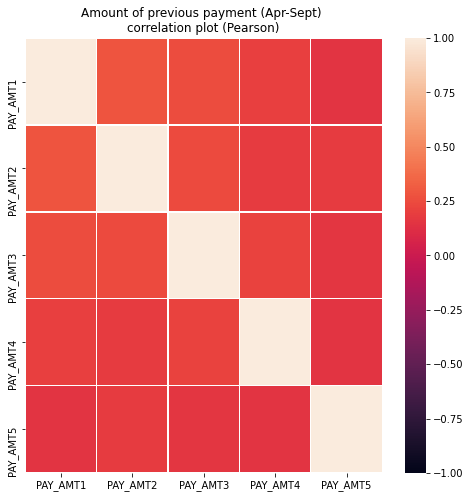

In [158]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

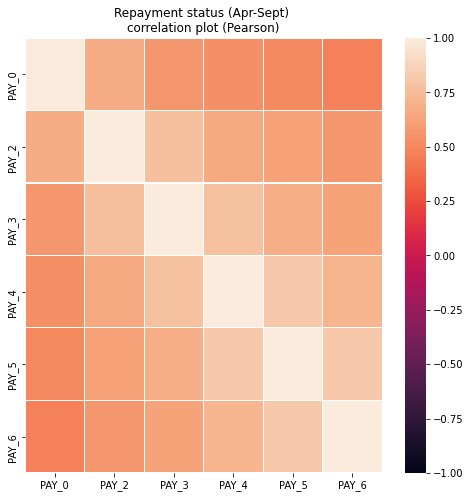

In [159]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [160]:
df = pd.get_dummies(X)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# Model Implementation

In [161]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [162]:
data1.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [163]:
# features=['PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT3']
# X = data1[features].copy()
# X.columns

In [165]:
# Original dataset
# from sklearn import train_test_split
from sklearn import preprocessing
X = data1.drop('Default', axis=1)  
y = data1['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=data1['Default'],random_state = 100)

In [166]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
round(y_train.value_counts()/y_train.shape[0] * 100,3)

0    77.879
1    22.121
Name: Default, dtype: float64

# Logistic regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


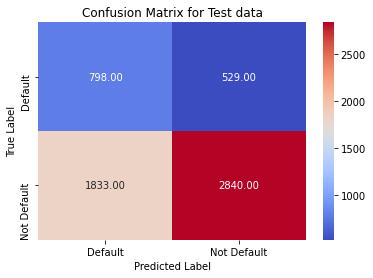

In [168]:
## Model Building

logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':y_test, 'predicted': logreg.predict(X_test)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()
#creating a confusion matrix
cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg
sns.heatmap(cm_logreg,annot=True ,fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [169]:
logreg.intercept_

array([3.54666775e-06])

In [170]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':y_test, 'predicted': logreg.predict(X_test)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,2650,1,0
1,9685,0,0
2,12101,0,0
3,9376,1,0
4,3767,0,0


In [171]:
#creating a confusion matrix
cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[ 798,  529],
       [1833, 2840]])

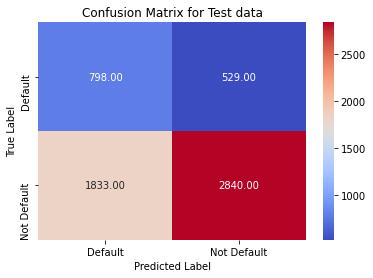

In [172]:
sns.heatmap(cm_logreg,annot=True ,fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [173]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.606


In [174]:
bankloans_test_pred_log.actual.value_counts()

0    4673
1    1327
Name: actual, dtype: int64

In [175]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      4673
           1       0.30      0.60      0.40      1327

    accuracy                           0.61      6000
   macro avg       0.57      0.60      0.55      6000
weighted avg       0.72      0.61      0.64      6000



In [176]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(logreg.predict_proba(X_test))
predict_prob_df.head()

,0,1
0,0.596845,0.403155
1,0.555628,0.444372
2,0.572233,0.427767
3,0.682678,0.317322
4,0.501754,0.498246


In [177]:
bankloans_test_pred_log = pd.concat([bankloans_test_pred_log, predict_prob_df], axis = 1)
bankloans_test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,2650,1,0,0.596845,0.403155
1,9685,0,0,0.555628,0.444372
2,12101,0,0,0.572233,0.427767
3,9376,1,0,0.682678,0.317322
4,3767,0,0,0.501754,0.498246


In [178]:
auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,4)

0.6367

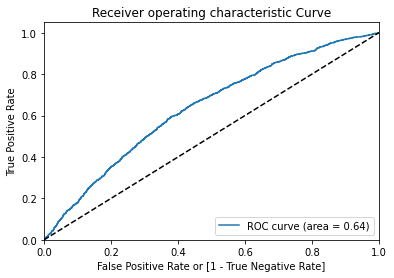

In [179]:
#Draw a roc curve
auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,4)

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1, 
                                         drop_intermediate= False)
plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Random forest classifier

In [180]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4461  212]
 [ 856  471]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.35      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [181]:
conrf = print(metrics.confusion_matrix(y_test, rfpred))
accrf = print(round(metrics.accuracy_score(y_test, rfpred), 4)*100)

[[4461  212]
 [ 856  471]]
82.19999999999999


In [190]:
sns.heatmap(rfpred,annot=True ,fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

IndexError: ignored

In [183]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4461  212]
 [ 856  471]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.35      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [184]:
probrf = rf.predict_proba(X_test)
predsrf = probrf[:,1]
fprrf, tprrf, thresholdrf = metrics.roc_curve(y_test, predsrf)
roc_aucrf = metrics.auc(fprrf, tprrf)

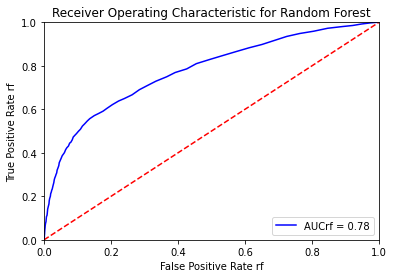

In [185]:
probrf = rf.predict_proba(X_test)
predsrf = probrf[:,1]
fprrf, tprrf, thresholdrf = metrics.roc_curve(y_test, predsrf)
roc_aucrf = metrics.auc(fprrf, tprrf)
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fprrf, tprrf, 'b', label = 'AUCrf = %0.2f' % roc_aucrf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate rf')
plt.xlabel('False Positive Rate rf')
plt.show()

# XgboostClassifier

In [186]:
##XGBoost
# from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost.xgbclassifier import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)
y_pred = xgb.predict(X_test)
conxgb = print(metrics.confusion_matrix(y_test, xgbpred))
accxgb = print(round(metrics.accuracy_score(y_test, xgbpred), 4)*100)

[[4466  207]
 [ 860  467]]
82.22


In [187]:
probxgb = xgb.predict_proba(X_test)
predsxgb = probxgb[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, predsxgb)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

In [188]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4466  207]
 [ 860  467]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.35      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



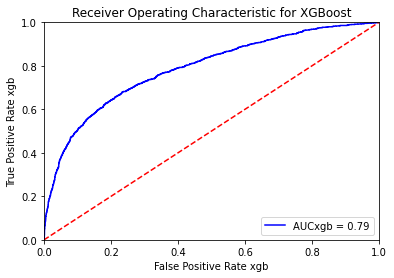

In [189]:
probxgb = xgb.predict_proba(X_test)
predsxgb = probxgb[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, predsxgb)
roc_aucxgb = metrics.auc(fprxgb, tprxgb
plt.title('Receiver Operating Characteristic for XGBoost')
plt.plot(fprxgb, tprxgb, 'b', label = 'AUCxgb = %0.2f' % roc_aucxgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate xgb')
plt.xlabel('False Positive Rate xgb')
plt.show()